In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA

In [2]:
CATEGORIES = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'hope']
COLORS = ['red', 'brown', 'purple', 'yellow', 'blue', 'orange', 'green']
# neutral gray
# black other

TRAIN_DATA_PATH_OUT = "datasets/train_essay_level_preproc.tsv"
DEV_DATA_PATH_OUT = "datasets/dev_essay_level_preproc.tsv"
TEST_DATA_PATH_OUT = "datasets/test_essay_level_preproc.tsv"

In [3]:
df = pd.read_csv(TRAIN_DATA_PATH_OUT, sep='\t', header=0)
df

,conversation_id,article_id,essay,empathy,distress,speaker_id,gender,education,race,age,...,split,essay_id,emotion,anger_count,disgust_count,fear_count,joy_count,sadness_count,surprise_count,hope_count
0,2,35,It breaks my heart to see people living in tho...,6.833333,6.625,30,1,6,3,37,...,train,1,Hope/Sadness,5.747126,4.597701,5.747126,5.747126,5.747126,6.896552,5.747126
1,3,35,I wonder why there aren't more people trying t...,5.833333,6.000,19,1,6,2,32,...,train,2,Anger,1.587302,1.587302,1.587302,11.111111,1.587302,1.587302,0.000000
2,5,35,"After reading the article, you can't help but ...",1.000000,1.375,17,1,6,1,29,...,train,4,Sadness,11.594203,8.695652,11.594203,15.942029,13.043478,2.898551,5.797101
3,6,213,It is so sad that someone who had such an amaz...,6.166667,6.625,16,2,5,1,28,...,train,5,Sadness,7.462687,4.477612,11.940299,1.492537,16.417910,7.462687,1.492537
4,8,213,"From reading the article, it looks like the wo...",6.833333,1.000,30,1,6,3,37,...,train,7,Neutral,3.225806,1.612903,8.064516,8.064516,12.903226,9.677419,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,495,218,I feel that this will become a national proble...,6.500000,6.750,30,1,6,3,37,...,train,994,Neutral,15.625000,9.375000,10.937500,6.250000,18.750000,6.250000,6.250000
788,496,103,The whole situation is sketchy. The wavering r...,3.166667,6.375,16,2,5,1,28,...,train,995,Neutral,17.241379,12.068966,20.689655,1.724138,13.793103,5.172414,0.000000
789,498,103,The death of a former aide to Russian Presiden...,6.000000,2.000,43,2,6,1,33,...,train,997,Neutral,7.272727,7.272727,18.181818,3.636364,12.727273,10.909091,0.000000
790,499,103,Everything about Russia really freaks me out. ...,6.000000,6.000,53,2,3,1,27,...,train,998,Fear,10.000000,8.181818,12.727273,4.545455,6.363636,3.636364,4.545455


array([[<AxesSubplot:title={'center':'anger_count'}>,
        <AxesSubplot:title={'center':'disgust_count'}>,
        <AxesSubplot:title={'center':'fear_count'}>,
        <AxesSubplot:title={'center':'joy_count'}>],
       [<AxesSubplot:title={'center':'sadness_count'}>,
        <AxesSubplot:title={'center':'surprise_count'}>,
        <AxesSubplot:title={'center':'hope_count'}>, <AxesSubplot:>]],
      dtype=object)

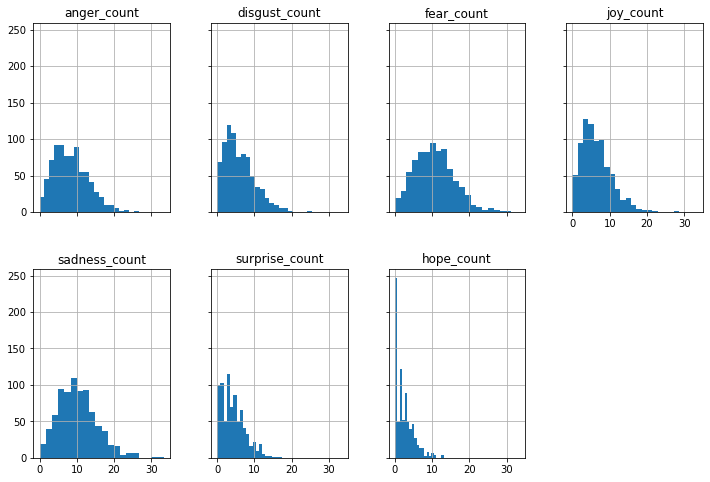

In [4]:
# TODO: change order (?), colors and titles
df[[f'{category}_count' for category in CATEGORIES]].hist(bins=20, sharex=True, sharey=True, layout=(2, 4), figsize=(12, 8))

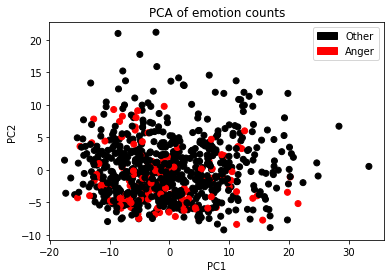

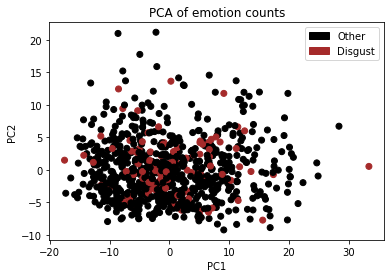

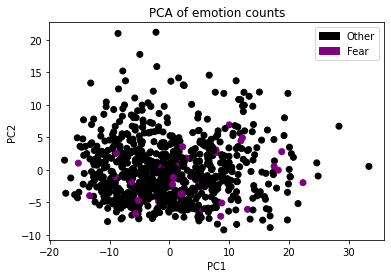

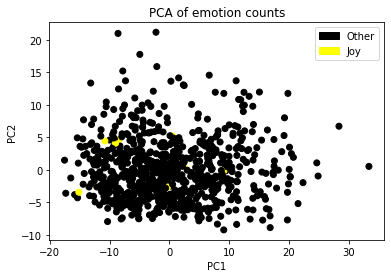

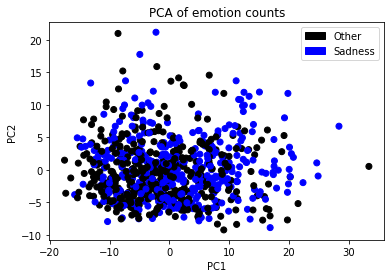

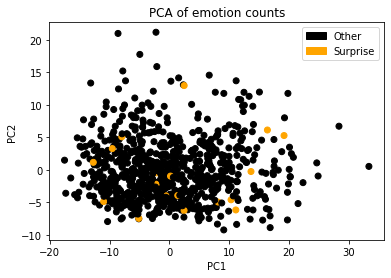

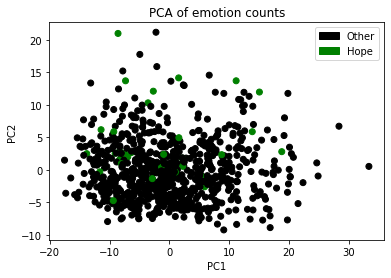

In [5]:
pca = PCA(n_components=2)
pca.fit(df[[f'{category}_count' for category in CATEGORIES]])
pca_train_df = pca.transform(df[[f'{category}_count' for category in CATEGORIES]])

# TODO: subplots

for category, color in zip(CATEGORIES, COLORS):
	colors = []
	for index, row in df.iterrows():
		if category.capitalize() in row['emotion']:
			colors.append(color)
		else:
			colors.append('black')
	plt.figure()
	plt.scatter(pca_train_df[:,0], pca_train_df[:,1], c=colors)
	plt.xlabel('PC1')
	plt.ylabel('PC2')
	red_patch = mpatches.Patch(color='black', label='Other')
	blue_patch = mpatches.Patch(color=color, label=category.capitalize())
	plt.legend(handles=[red_patch, blue_patch])
	plt.title('PCA of emotion counts')

In [ ]:
# TODO: do for dev and test?